<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Pacientes_en_UCI_por_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI.csv', index_col='Region')

In [0]:
data_raw = data_raw.drop(columns='Codigo region')

In [4]:
data_raw.head()

,Poblacion,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
Region,,,,,,,,,,,,,,,
Arica y Parinacota,252110,0,0,0,0,2,4,4,5,5,5,5,5,5,5
Tarapaca,382773,1,1,1,1,1,2,2,2,2,3,3,2,2,1
Antofagasta,691854,3,4,3,3,3,3,2,2,2,3,2,3,4,4
Atacama,314709,0,0,0,0,0,0,0,1,1,1,1,1,1,1
Coquimbo,836096,1,1,1,2,1,1,2,1,1,2,2,1,0,1


In [0]:
data_raw.loc['Total'] = data_raw.sum(axis=0) 

In [0]:
data_raw = data_raw.drop(columns='Poblacion')

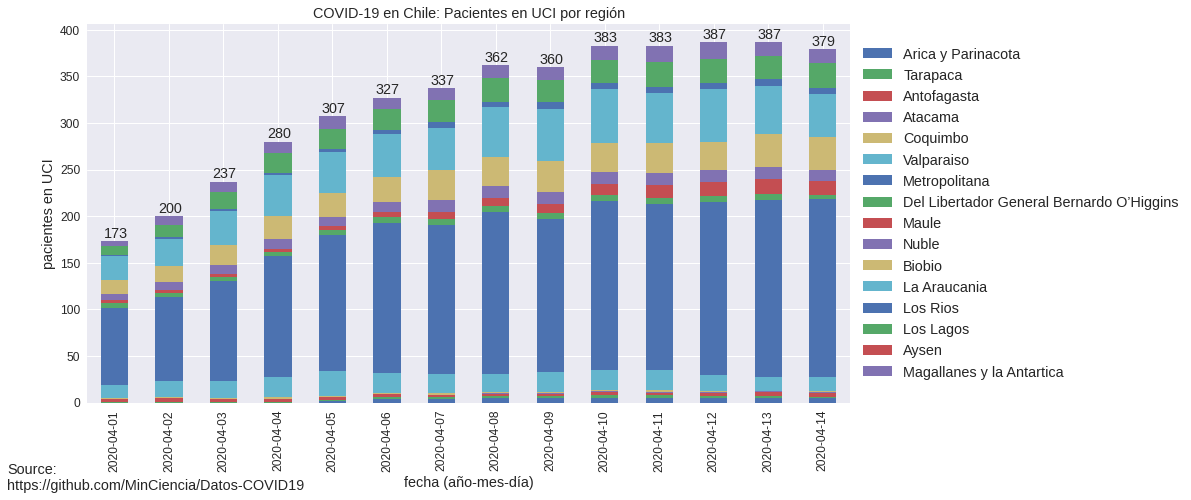

In [7]:
fig, ax = plt.subplots(figsize=(14,7))
data_raw[:-1].T.plot(ax=ax, kind="bar", stacked=True)
for i, val in enumerate(data_raw.loc['Total']):
  ax.text(i-0.2, val+4, f"{val}", fontsize='x-large')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-large')

ax.tick_params(labelsize='large')
ax.set_title(f'COVID-19 en Chile: Pacientes en UCI por región', fontsize='x-large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='x-large')
ax.set_ylabel(f'pacientes en UCI', fontsize='x-large')
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-60), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('2020-04-15-COVID-19-Chile-Pacientes-en-UCI-por-region.png', format='png', bbox_inches='tight', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-15-COVID-19-Chile-Pacientes-en-UCI-por-region.png")